In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib


In [2]:
cars = pd.read_csv("K:\DATA SCIENCE\DataSets\CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
cars.shape

(4340, 8)

In [5]:
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
print(cars['fuel'].value_counts())
print(cars['seller_type'].value_counts())
print(cars['transmission'].value_counts())
print(cars['owner'].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()

In [23]:
cars['fuel']= label.fit_transform(cars['fuel'])
cars['seller_type']= label.fit_transform(cars['seller_type'])
cars['transmission']= label.fit_transform(cars['transmission'])
cars['owner']= label.fit_transform(cars['owner'])

In [24]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [27]:
X = cars.drop(['selling_price','name'],axis = 1)
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


In [28]:
Y = cars['selling_price']
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)

In [34]:
X.shape, X_train.shape, X_test.shape

((4340, 6), (3472, 6), (868, 6))

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
linear = LinearRegression()

In [37]:
linear.fit(X_train,Y_train)

LinearRegression()

In [38]:
pred_linear = linear.predict(X_test)

In [41]:
# R2 error

score1 = metrics.r2_score(Y_test,pred_linear)
print('The R2 Error score is :',score1)

The R2 Error score is : 0.4937727426949996


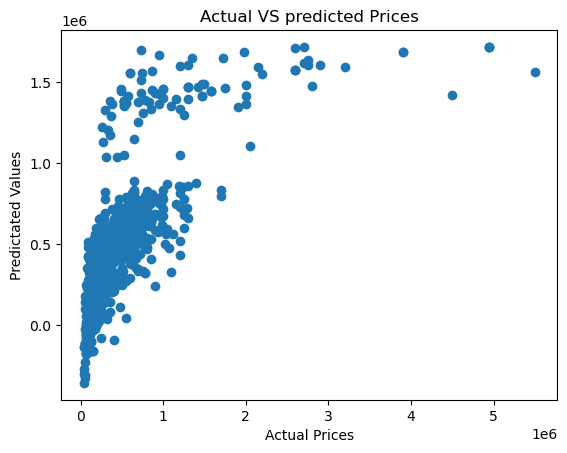

In [46]:
plt.scatter(Y_test, pred_linear)

plt.ylabel('Predictated Values')
plt.xlabel('Actual Prices')
plt.title('Actual VS predicted Prices')
plt.show()

# Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
from sklearn import metrics

In [49]:
lasso = Lasso()

In [50]:
lasso.fit(X_train,Y_train)

Lasso()

In [51]:
pred_lasso = lasso.predict(X_test)

In [55]:
# R2 error

score2 = metrics.r2_score(Y_test,pred_lasso)
print('The R2 Error score is :',score2)

The R2 Error score is : 0.4937726164116225


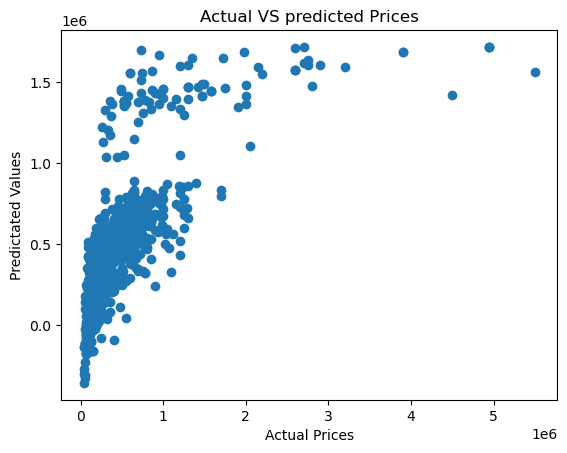

In [54]:
plt.scatter(Y_test, pred_lasso)

plt.ylabel('Predictated Values')
plt.xlabel('Actual Prices')
plt.title('Actual VS predicted Prices')
plt.show()